In [1]:
#Import tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sexmachine.detector as gender
import csv

In [2]:
d = gender.Detector()

In [3]:
#Read data and import full file.
df = pd.read_csv('/Users/windyseng/Desktop/salaries/DCAS_FY17_Active_Annual.csv', header=0, delimiter=',', encoding="utf-8-sig")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 17 columns):
Fiscal Year                   1788 non-null int64
Payroll Number                1788 non-null int64
Agency Name                   1788 non-null object
Last Name                     1788 non-null object
First Name                    1788 non-null object
Mid Init                      964 non-null object
Agency Start Date             1788 non-null object
Work Location Borough         1788 non-null object
Title Description             1788 non-null object
Leave Status as of June 30    1788 non-null object
Base Salary                   1788 non-null float64
Pay Basis                     1788 non-null object
Regular Hours                 1788 non-null float64
Regular Gross Paid            1788 non-null float64
OT Hours                      1788 non-null float64
Total OT Paid                 1788 non-null float64
Total Other Pay               1788 non-null float64
dtypes: float64(6), int

In [4]:
#Replaced columns, spaces, and underscores in column titles if needed.
df.columns = df.columns.str.replace('\s+', '')
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('_', '')

In [5]:
#Review fields in dataset
df.head()

,FiscalYear,PayrollNumber,AgencyName,LastName,FirstName,MidInit,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay
0,2017,1,DEPT OF CITYWIDE ADMIN SVCS,HARGRAVE,EDWARD,E,6/23/96,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2085.72,35781.42,544.25,15458.46,4046.60
1,2017,2,DEPT OF CITYWIDE ADMIN SVCS,HICKS,LLOYD,NaN,6/23/96,BROOKLYN,*CUSTODIAL ASSISTANT ...,ACTIVE,34739.0,per Annum,2085.72,35736.04,322.25,9890.72,4816.65
2,2017,3,DEPT OF CITYWIDE ADMIN SVCS,PATTERSON,TYRONE,J,6/23/96,QUEENS,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2077.47,35643.84,906.75,24980.94,3627.33
3,2017,4,DEPT OF CITYWIDE ADMIN SVCS,PLUMMER,DENNIS,NaN,6/23/96,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,37150.0,per Annum,2085.72,38216.73,240.75,7428.48,5491.88
4,2017,5,DEPT OF CITYWIDE ADMIN SVCS,SALDORIGA,MERCEDES,NaN,6/23/96,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34828.0,per Annum,2085.72,35827.62,0.00,0.00,5370.42


In [6]:
df['AgencyStartDate']=pd.to_datetime(df['AgencyStartDate'])

In [7]:
#Creates column in dataframe "Gender"
df['Gender'] = df['FirstName']
d = gender.Detector(case_sensitive=False)

In [8]:
#df["SplitName"] = df['FirstName']
#df['SplitName'] = df['SplitName'].str.split()

In [9]:
for i in range(0, 1788): 
	df['Gender'][i] = d.get_gender(df['FirstName'][i])
	print i

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
pandy = float(sum(df["Gender"] == "andy")) / sum(df["Gender"].notnull())
pmale = float(sum(df["Gender"] == "male")) / sum(df["Gender"].notnull())
pfemale = float(sum(df["Gender"] == "female")) / sum(df["Gender"].notnull())
pmmale = float(sum(df["Gender"] == "mostly_male")) / sum(df["Gender"].notnull())
pmfemale = float(sum(df["Gender"] == "mostly_female")) / sum(df["Gender"].notnull())

In [11]:
print(pandy) #0.17
print(pmale) #0.44
print(pfemale) #0.34
print(pmmale) #0.02
print(pmfemale) #0.03
print(pandy + pmale + pfemale + pmmale + pmfemale) #1.00

0.171140939597
0.440715883669
0.337248322148
0.0173378076063
0.0335570469799
1.0


In [12]:
#Review gender assigned based on first name.
df.head()

,FiscalYear,PayrollNumber,AgencyName,LastName,FirstName,MidInit,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender
0,2017,1,DEPT OF CITYWIDE ADMIN SVCS,HARGRAVE,EDWARD,E,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2085.72,35781.42,544.25,15458.46,4046.60,male
1,2017,2,DEPT OF CITYWIDE ADMIN SVCS,HICKS,LLOYD,NaN,1996-06-23,BROOKLYN,*CUSTODIAL ASSISTANT ...,ACTIVE,34739.0,per Annum,2085.72,35736.04,322.25,9890.72,4816.65,male
2,2017,3,DEPT OF CITYWIDE ADMIN SVCS,PATTERSON,TYRONE,J,1996-06-23,QUEENS,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2077.47,35643.84,906.75,24980.94,3627.33,male
3,2017,4,DEPT OF CITYWIDE ADMIN SVCS,PLUMMER,DENNIS,NaN,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,37150.0,per Annum,2085.72,38216.73,240.75,7428.48,5491.88,male
4,2017,5,DEPT OF CITYWIDE ADMIN SVCS,SALDORIGA,MERCEDES,NaN,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34828.0,per Annum,2085.72,35827.62,0.00,0.00,5370.42,female


In [13]:
df_copy = df #just in case

In [14]:
#Removed columns no longer needed--First name, middle initial, and split name which was used previously for first and last
#df = df.drop(['FirstName','MidInit','SplitName'], axis=1)

In [15]:
#Review columns were dropped properly
df.head()

,FiscalYear,PayrollNumber,AgencyName,LastName,FirstName,MidInit,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender
0,2017,1,DEPT OF CITYWIDE ADMIN SVCS,HARGRAVE,EDWARD,E,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2085.72,35781.42,544.25,15458.46,4046.60,male
1,2017,2,DEPT OF CITYWIDE ADMIN SVCS,HICKS,LLOYD,NaN,1996-06-23,BROOKLYN,*CUSTODIAL ASSISTANT ...,ACTIVE,34739.0,per Annum,2085.72,35736.04,322.25,9890.72,4816.65,male
2,2017,3,DEPT OF CITYWIDE ADMIN SVCS,PATTERSON,TYRONE,J,1996-06-23,QUEENS,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2077.47,35643.84,906.75,24980.94,3627.33,male
3,2017,4,DEPT OF CITYWIDE ADMIN SVCS,PLUMMER,DENNIS,NaN,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,37150.0,per Annum,2085.72,38216.73,240.75,7428.48,5491.88,male
4,2017,5,DEPT OF CITYWIDE ADMIN SVCS,SALDORIGA,MERCEDES,NaN,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34828.0,per Annum,2085.72,35827.62,0.00,0.00,5370.42,female


In [16]:
#Copy dataframe to .csv file
df.to_csv('Gender_Pay_DCAS_FY17.csv', index=False, sep=',') #save df that has gender and name

In [17]:
df.describe()

,FiscalYear,PayrollNumber,BaseSalary,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay
count,1788.0,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,2017.0,894.500000,61431.597987,1745.730733,56360.001762,194.094385,6162.444161,1426.140391
std,0.0,516.295458,32295.716844,483.003136,34833.305187,312.160412,9954.213539,2084.130459
min,2017.0,1.000000,27446.000000,65.000000,1130.140000,0.000000,0.000000,0.000000
25%,2017.0,447.750000,35167.000000,1825.000000,35355.540000,0.000000,0.000000,0.000000
50%,2017.0,894.500000,50799.000000,1825.000000,46860.975000,22.875000,733.565000,369.575000
75%,2017.0,1341.250000,77162.500000,2085.720000,73488.537500,282.812500,8822.902500,2239.742500
max,2017.0,1788.000000,226366.000000,2165.720000,232933.960000,1849.770000,55436.950000,16394.320000


In [18]:
df_copy = df #just in case

In [19]:
#Changing mostly male or mostly female to male or female
df = df[df.Gender != 'andy']
df['Gender'] = df['Gender'].map({'male': 'male', 'female': 'female', 'mostly_male': 'male','mostly_female': 'female'})

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
pandy = float(sum(df["Gender"] == "andy")) / sum(df["Gender"].notnull())
pmale = float(sum(df["Gender"] == "male")) / sum(df["Gender"].notnull())
pfemale = float(sum(df["Gender"] == "female")) / sum(df["Gender"].notnull())
pmmale = float(sum(df["Gender"] == "mostly_male")) / sum(df["Gender"].notnull())
pmfemale = float(sum(df["Gender"] == "mostly_female")) / sum(df["Gender"].notnull())

In [21]:
#Review that replacements completed properly
df.head()

,FiscalYear,PayrollNumber,AgencyName,LastName,FirstName,MidInit,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender
0,2017,1,DEPT OF CITYWIDE ADMIN SVCS,HARGRAVE,EDWARD,E,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2085.72,35781.42,544.25,15458.46,4046.60,male
1,2017,2,DEPT OF CITYWIDE ADMIN SVCS,HICKS,LLOYD,NaN,1996-06-23,BROOKLYN,*CUSTODIAL ASSISTANT ...,ACTIVE,34739.0,per Annum,2085.72,35736.04,322.25,9890.72,4816.65,male
2,2017,3,DEPT OF CITYWIDE ADMIN SVCS,PATTERSON,TYRONE,J,1996-06-23,QUEENS,*CUSTODIAL ASSISTANT ...,ACTIVE,34783.0,per Annum,2077.47,35643.84,906.75,24980.94,3627.33,male
3,2017,4,DEPT OF CITYWIDE ADMIN SVCS,PLUMMER,DENNIS,NaN,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,37150.0,per Annum,2085.72,38216.73,240.75,7428.48,5491.88,male
4,2017,5,DEPT OF CITYWIDE ADMIN SVCS,SALDORIGA,MERCEDES,NaN,1996-06-23,MANHATTAN,*CUSTODIAL ASSISTANT ...,ACTIVE,34828.0,per Annum,2085.72,35827.62,0.00,0.00,5370.42,female


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 1787
Data columns (total 18 columns):
FiscalYear               1482 non-null int64
PayrollNumber            1482 non-null int64
AgencyName               1482 non-null object
LastName                 1482 non-null object
FirstName                1482 non-null object
MidInit                  818 non-null object
AgencyStartDate          1482 non-null datetime64[ns]
WorkLocationBorough      1482 non-null object
TitleDescription         1482 non-null object
LeaveStatusasofJune30    1482 non-null object
BaseSalary               1482 non-null float64
PayBasis                 1482 non-null object
RegularHours             1482 non-null float64
RegularGrossPaid         1482 non-null float64
OTHours                  1482 non-null float64
TotalOTPaid              1482 non-null float64
TotalOtherPay            1482 non-null float64
Gender                   1482 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), objec

In [23]:
#Grouping by gender and salary
df.groupby(['Gender'])[["BaseSalary"]].mean()

,BaseSalary
Gender,
female,63654.126124
male,60114.821221


In [24]:
#Grouping by gender and salary
df.groupby(['Gender'])[["BaseSalary"]].median()

,BaseSalary
Gender,
female,55460.00
male,48210.92


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 1787
Data columns (total 18 columns):
FiscalYear               1482 non-null int64
PayrollNumber            1482 non-null int64
AgencyName               1482 non-null object
LastName                 1482 non-null object
FirstName                1482 non-null object
MidInit                  818 non-null object
AgencyStartDate          1482 non-null datetime64[ns]
WorkLocationBorough      1482 non-null object
TitleDescription         1482 non-null object
LeaveStatusasofJune30    1482 non-null object
BaseSalary               1482 non-null float64
PayBasis                 1482 non-null object
RegularHours             1482 non-null float64
RegularGrossPaid         1482 non-null float64
OTHours                  1482 non-null float64
TotalOTPaid              1482 non-null float64
TotalOtherPay            1482 non-null float64
Gender                   1482 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), objec

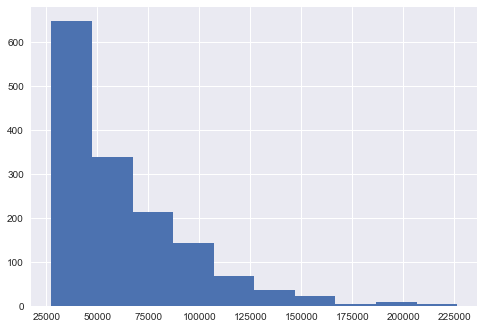

In [26]:
#Distribution of base salary of males and females
c=df['BaseSalary']
c.hist()
plt.show()

In [27]:
#Creating dimension/filtering for Male Gender only
m = df[df.Gender == 'male']

In [28]:
#Creating dimension/filtering for Female Gender only
f = df[df.Gender == 'female']

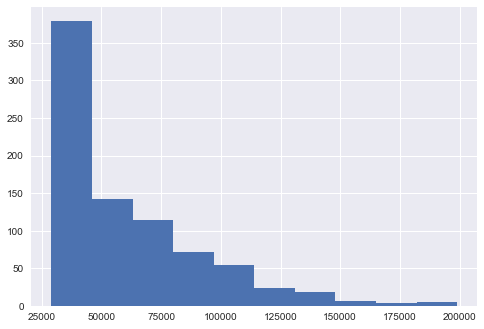

In [29]:
#Distribution of Male base salary
p=m['BaseSalary']
p.hist()
plt.show()

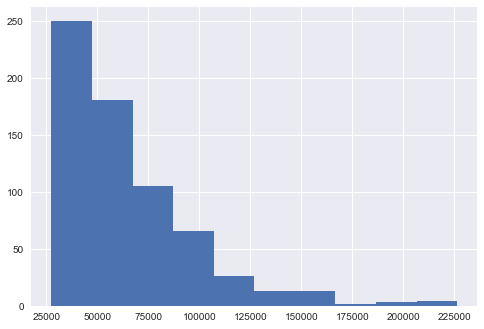

In [30]:
#Distribution of female base salary
p=f['BaseSalary']
p.hist()
plt.show()

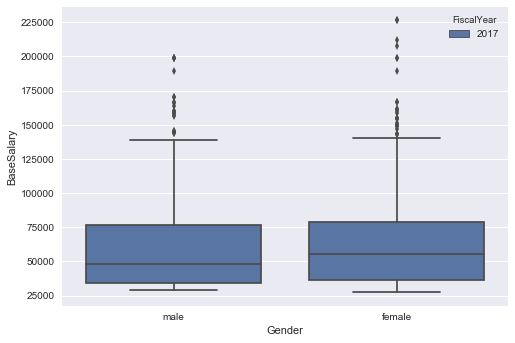

In [31]:
#Boxplot of Male and Females showing more outliers for females in upper salary range. 
sns.boxplot(x="Gender", y="BaseSalary", hue="FiscalYear", data=df);
plt.show()

In [32]:
#Creating a dimension for staff whose name could not be classified as Male or Female
a = df_copy[df_copy.Gender == 'andy']

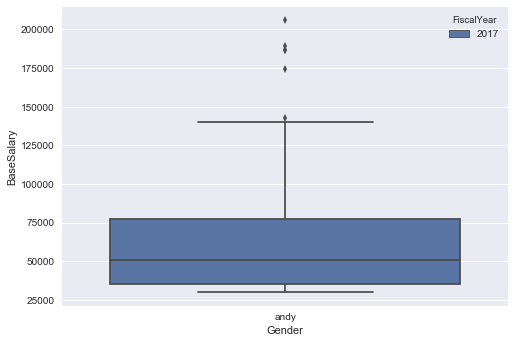

In [33]:
sns.boxplot(x="Gender", y="BaseSalary", hue="FiscalYear", data=a);
plt.show()

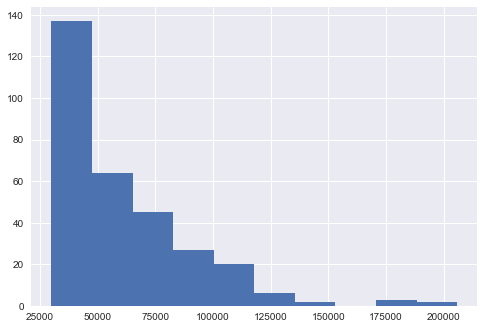

In [34]:
#The 17% or 306 entries classified as "andy".
b=a['BaseSalary']
b.hist()
plt.show()

In [35]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 9 to 1781
Data columns (total 18 columns):
FiscalYear               306 non-null int64
PayrollNumber            306 non-null int64
AgencyName               306 non-null object
LastName                 306 non-null object
FirstName                306 non-null object
MidInit                  146 non-null object
AgencyStartDate          306 non-null datetime64[ns]
WorkLocationBorough      306 non-null object
TitleDescription         306 non-null object
LeaveStatusasofJune30    306 non-null object
BaseSalary               306 non-null float64
PayBasis                 306 non-null object
RegularHours             306 non-null float64
RegularGrossPaid         306 non-null float64
OTHours                  306 non-null float64
TotalOTPaid              306 non-null float64
TotalOtherPay            306 non-null float64
Gender                   306 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(9)
memory usage:

In [38]:
SortedSalary=sorted(df['BaseSalary'])

In [41]:
df['BaseSalary'].describe()

count      1482.000000
mean      61698.194467
std       32632.769122
min       27446.000000
25%       35169.250000
50%       50843.000000
75%       77000.000000
max      226366.000000
Name: BaseSalary, dtype: float64

In [42]:
df['BaseSalary'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     27446.0
0.1     34364.0
0.2     34364.0
0.3     36071.0
0.4     44141.4
0.5     50843.0
0.6     61351.0
0.7     71092.8
0.8     85229.2
0.9    105000.0
1.0    226366.0
Name: BaseSalary, dtype: float64

In [43]:
var=np.array(df['BaseSalary'])

In [45]:
np.percentile(var,np.arange(0,100,25))

array([ 27446.  ,  35169.25,  50843.  ,  77000.  ])

In [47]:
df.BaseSalary.quantile(.95)

126624.80000000006

In [48]:
df.BaseSalary.quantile(.99)

166973.0

In [49]:
df95=df[df.BaseSalary<df.BaseSalary.quantile(.95)]

In [50]:
df95.describe()

,FiscalYear,PayrollNumber,BaseSalary,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay
count,1407.0,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,2017.0,893.337598,56737.854442,1759.826404,51977.094741,210.418451,6678.003937,1498.328465
std,0.0,515.627072,24545.172071,479.856889,27426.073868,319.331455,10224.143729,2119.039169
min,2017.0,1.000000,27446.000000,88.130000,1130.140000,0.000000,0.000000,0.000000
25%,2017.0,459.500000,34798.500000,1825.000000,35355.540000,0.000000,0.000000,8.250000
50%,2017.0,881.000000,49682.000000,1825.000000,44762.480000,38.250000,1141.750000,468.000000
75%,2017.0,1331.500000,72563.000000,2085.720000,69643.120000,321.750000,10231.235000,2481.240000
max,2017.0,1788.000000,125386.000000,2165.720000,129024.130000,1849.770000,55436.950000,16394.320000


In [51]:
#Grouping by gender and salary
df95.groupby(['Gender'])[["BaseSalary"]].mean()

,BaseSalary
Gender,
female,58220.385359
male,55546.127667


In [52]:
#Grouping by gender and salary
df.groupby(['Gender'])[["BaseSalary"]].median()

,BaseSalary
Gender,
female,55460.00
male,48210.92


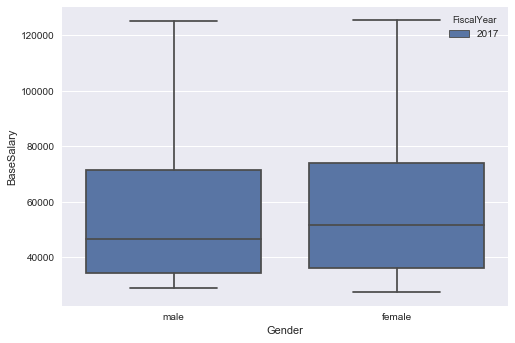

In [53]:
#Boxplot of Male and Females showing salary range of those under 95th percentile and female salaries are still higher than males in this dataset. 
sns.boxplot(x="Gender", y="BaseSalary", hue="FiscalYear", data=df95);
plt.show()